### Testing Evo

#### Imports

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import math
import torch_geometric
from torch_geometric.nn import GCNConv
import IPython
from IPython.display import display, HTML

from graphUtils import add_edges
from generator import generate_organism
from cell import Cell
from organism import Organism
from GNCAmodel import GNCA
from visualizer import Visualizer
from evo_trainer import Evo_Trainer

2023-02-02 23:59:58,016	INFO worker.py:1528 -- Started a local Ray instance.


#### Train the network

In [2]:
n = 10
#device = torch.device('mps')
device = torch.device('cpu')
trainer = Evo_Trainer(n, device, popsize=10)

(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 12 (seed=128210842, Thu Feb  2 23:59:59 2023)


In [3]:
trainer.train(1000, 'centered2')

         iter : 1
  median_eval : -4.985110282897949
    mean_eval : -92.57645416259766
pop_best_eval : -2.8724780082702637
    best_eval : -2.8724780082702637
   worst_eval : -782.3624877929688

         iter : 2
  median_eval : -4.480699062347412
    mean_eval : -31.34933090209961
pop_best_eval : -2.5680038928985596
    best_eval : -2.5680038928985596
   worst_eval : -782.3624877929688

         iter : 3
  median_eval : -4.998656749725342
    mean_eval : -34.04175567626953
pop_best_eval : -3.9941234588623047
    best_eval : -2.5680038928985596
   worst_eval : -782.3624877929688

         iter : 4
  median_eval : -4.494933128356934
    mean_eval : -6.792699337005615
pop_best_eval : -2.8485043048858643
    best_eval : -2.5680038928985596
   worst_eval : -782.3624877929688

         iter : 5
  median_eval : -26.40770149230957
    mean_eval : -109.09493255615234
pop_best_eval : -3.6191999912261963
    best_eval : -2.5680038928985596
   worst_eval : -782.3624877929688

         iter : 6
 

In [4]:
network = trainer.problem.parameterize_net(trainer.searcher.status['center'])

In [5]:
network = trainer.get_trained_network()

#### Visualize trained network

In [6]:
organism = generate_organism(20, device)
graph = organism.toGraph()
visualizer = Visualizer()

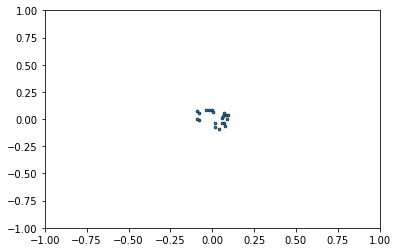

In [7]:
anim = visualizer.animate_organism(graph, network, frames=100)
IPython.display.HTML(anim)